# ++ Carregar dados históricos da Bovespa em Dataframe para análise ++

In [1]:
from datetime import date, datetime, timedelta
import time
hoje = datetime.today().strftime('%d/%m/%Y')
time.asctime( time.localtime(time.time()) )

'Tue Jun 10 14:49:09 2025'

In [2]:
import pandas as pd
from ipywidgets import IntProgress
import ipywidgets as widgets
import json
from bs4 import BeautifulSoup
pd.__version__

'1.3.4'

In [3]:
from IPython.display import FileLink, FileLinks, display, clear_output, Markdown
FileLink('Resultados.ipynb')

C:\Users\F0435280\OneDrive - Banco do Brasil S.A\Área de Trabalho\Alexandre\StockManager-main\Resultados.ipynb

In [4]:
# Setando opção do Pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Setando separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
from pacote.functions import *

In [6]:
ano = time.localtime().tm_year
if time.localtime().tm_mon < 3 and ano == time.localtime().tm_year:
    str_ano, str_nov_ant, str_dez_ant = f'A{ano}', f'M11{ano-1}', f'M12{ano-1}'
    LISTA_ARQUIVOS = [str_ano, str_nov_ant, str_dez_ant]
else:
    str_ano = f'A{ano}'
    LISTA_ARQUIVOS = [str_ano]

In [7]:
df = carrega_dados(LISTA_ARQUIVOS)

In [8]:
# Monday is 0 and Sunday is 6.
dia_semana  = datetime.today().weekday()
ajuste_dias = -3 if dia_semana == 0 else -1
dt_esperado_ult = (datetime.today() + timedelta(days=ajuste_dias)).strftime('%Y-%m-%d')
dt_max = str(df["dtPregao"].max()).split()[0]

if dt_esperado_ult == dt_max:
    font_color="alert-success"
    a = "Atualizado!"
else:
    font_color="alert-danger"
    a = "Desatualizado!!! Última data " + str(dt_max)
def printmd(string):
    display(Markdown(string))

In [9]:
#  df_n_dias | vol | col_pc | pc_min | avg_vr_fech

style, layout, max_count, parm_vol = {'description_width':'initial'}, {'width':'400px'}, 7, 1000000
bar = IntProgress(min=0, max=max_count, style=style, layout=layout) # instantiate the bar
display(bar) # display the bar

d25 = monta_tabela(monta_df_periodos(df, 25), parm_vol, '1.0%', 24, 0.5, bar)
d20 = monta_tabela(monta_df_periodos(df, 20), parm_vol, '1.0%', 19, 0.5, bar)
d15 = monta_tabela(monta_df_periodos(df, 15), parm_vol, '1.0%', 14, 0.5, bar)
d10 = monta_tabela(monta_df_periodos(df, 10), parm_vol, '1.0%', 9, 0.5, bar)
d05 = monta_tabela(monta_df_periodos(df, 5), parm_vol, '1.0%', 5, 0.5, bar)
d04 = monta_tabela(monta_df_periodos(df, 4), parm_vol, '1.0%', 4, 0.5, bar)
d03 = monta_tabela(monta_df_periodos(df, 3), parm_vol, '1.0%', 3, 0.5, bar)
merge1 = pd.merge(d25['Acao'], d20['Acao'], how ='inner', on =['Acao'])
merge2 = pd.merge(merge1, d15['Acao'], how ='inner', on =['Acao'])
merge3 = pd.merge(merge2, d10['Acao'], how ='inner', on =['Acao'])
merge_final = pd.merge(merge3, d05['Acao'], how ='inner', on =['Acao'])
if merge_final.empty:
    merge_final = "<< Sem ações boas em todo o período >>"

IntProgress(value=0, layout=Layout(width='400px'), max=7, style=ProgressStyle(description_width='initial'))

In [10]:
def on_button_clicked(b):
    with output:
        clear_output()
        index = int(b.description[0])
        display(consulta_acao_formatada(df, df_button['Acao'].iloc[index]))

if len(d20) > 5:
    df_button = d20
    acao_botoes = "d20"
elif len(d15) > 5:
    df_button = d15
    acao_botoes = "d15"
elif len(d10) > 5:
    df_button = d10
    acao_botoes = "d10"
elif len(d05) > 5:
    df_button = d05
    acao_botoes = "d05"
elif len(d04) > 5:
    df_button = d04
    acao_botoes = "d04"
else:
    df_button = d03
    acao_botoes = "d03"
print(acao_botoes)

button0 = widgets.Button(description=f'{"0-"}{df_button["Acao"].iloc[0]}') if df_button["Acao"].size > 0 else None
button1 = widgets.Button(description=f'{"1-"}{df_button["Acao"].iloc[1]}') if df_button["Acao"].size > 1 else None
button2 = widgets.Button(description=f'{"2-"}{df_button["Acao"].iloc[2]}') if df_button["Acao"].size > 2 else None
button3 = widgets.Button(description=f'{"3-"}{df_button["Acao"].iloc[3]}') if df_button["Acao"].size > 3 else None
button4 = widgets.Button(description=f'{"4-"}{df_button["Acao"].iloc[4]}') if df_button["Acao"].size > 4 else None
button5 = widgets.Button(description=f'{"5-"}{df_button["Acao"].iloc[5]}') if df_button["Acao"].size > 5 else None
button6 = widgets.Button(description=f'{"6-"}{df_button["Acao"].iloc[6]}') if df_button["Acao"].size > 6 else None
output = widgets.Output()

lista_buttons = []
if button0:
    button0.on_click(on_button_clicked)
    lista_buttons.append(button0)
if button1:
    button1.on_click(on_button_clicked)
    lista_buttons.append(button1)
if button2:
    button2.on_click(on_button_clicked)
    lista_buttons.append(button2)
if button3:
    button3.on_click(on_button_clicked)
    lista_buttons.append(button3)
if button4:
    button4.on_click(on_button_clicked)
    lista_buttons.append(button4)
if button5:
    button5.on_click(on_button_clicked)
    lista_buttons.append(button5)
if button6:
    button6.on_click(on_button_clicked)
    lista_buttons.append(button6)

d15


In [11]:
ativos_dividendos_hoje = busca_ativos_dividendos()

In [12]:
# Setando definição de cores
def color_red_dividend(val):
    color = 'red' if val in ativos_dividendos_hoje else 'black'
    return 'color: %s' % color

In [13]:
d25_format = d25.style.applymap(color_red_dividend, subset=['Acao'])
d20_format = d20.style.applymap(color_red_dividend, subset=['Acao'])
d15_format = d15.style.applymap(color_red_dividend, subset=['Acao'])
d10_format = d10.style.applymap(color_red_dividend, subset=['Acao'])
d05_format = d05.style.applymap(color_red_dividend, subset=['Acao'])
d04_format = d04.style.applymap(color_red_dividend, subset=['Acao'])
d03_format = d03.style.applymap(color_red_dividend, subset=['Acao'])
d25_format = d25_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d20_format = d20_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d15_format = d15_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d10_format = d10_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d05_format = d05_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d04_format = d04_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d03_format = d03_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})

In [14]:
printmd(f'**<div class={font_color}>{hoje}, Arquivo {a}</div>**')

**<div class=alert-success>10/06/2025, Arquivo Atualizado!</div>**

<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">  Dividendos Hoje </p>

In [15]:
ativos_dividendos_hoje

()

<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">  25 dias, order by 1% </p>

In [16]:
d25_format if not d25.empty else print('<< Sem ações boas para 25 dias >>')

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
116,AMBP3F,25,24,20,17,14,13,12,10,135,"3,235,191.97",146.90,0.18


<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">  20 dias, order by 1% </p>

In [17]:
d20_format if not d20.empty else print('<< Sem ações boas para 20 dias >>')

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
1065,GOLL4,20,19,18,18,17,16,15,15,138,"28,929,375.60",1.22,2.01
115,AMBP3F,20,19,17,14,11,10,9,9,109,"3,542,430.04",153.31,0.29
149,AURA33,20,19,16,15,12,10,8,6,106,"12,291,605.53",41.16,-0.50


<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">  15 dias, order by 1% </p>

In [18]:
d15_format if not d15.empty else print('<< Sem ações boas para 10 dias >>')

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
1031,GOLL4,15,14,14,14,13,12,11,11,104,"34,722,304.60",1.31,1.47
112,AMBP3F,15,14,12,10,8,7,6,6,78,"3,822,316.52",162.23,0.31
1863,SBFG3,14,14,13,10,9,7,6,5,78,"19,970,559.93",11.61,0.30
146,AURA33,15,14,12,11,8,6,5,4,75,"13,142,936.37",43.27,-0.47
1540,ONCO3,15,14,13,11,7,5,4,4,73,"6,831,258.73",4.88,0.50
159,AZEV4,14,14,9,9,7,3,3,2,61,"1,790,976.07",0.74,0.55


<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">  10 dias, order by 1% </p>

In [19]:
d10_format if not d10.empty else print('<< Sem ações boas para 10 dias >>')

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
998,GOLL4,10,9,9,9,8,7,6,6,64,"28,383,832.80",1.34,1.11
114,AMOB3,9,9,9,8,7,7,7,6,62,"2,646,726.90",9.83,476.00
108,AMBP3,10,10,10,8,6,6,6,6,62,"32,980,531.70",177.19,0.31
126,ARML3,9,9,9,9,8,6,5,5,60,"3,250,382.50",4.96,0.42
1044,HBOR3,9,9,9,9,7,7,6,4,60,"2,459,626.00",2.66,0.00
1364,MGLU3,10,10,9,7,7,6,6,4,59,"357,460,656.20",9.61,0.90
1804,SBFG3,10,10,10,7,6,5,5,5,58,"22,080,892.90",11.90,0.45
163,AZUL4,9,9,9,8,7,7,4,4,57,"68,725,472.60",0.97,-0.53
1688,RCSL4,10,9,9,8,8,6,4,3,57,"2,374,977.70",1.13,1.28
109,AMBP3F,10,10,8,7,6,5,5,5,56,"4,818,469.43",175.94,0.44


<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">  5 dias, order by 1% </p>

In [20]:
d05_format

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
985,HBOR3,5,5,5,5,5,5,4,3,37,"3,370,321.60",2.77,-0.01
284,BHIA3,5,5,5,4,4,4,4,4,35,"40,479,579.80",4.12,1.97
1494,PMAM3,5,5,5,5,4,4,3,2,33,"1,622,578.20",2.18,0.11
1331,MUTC34,5,5,5,5,4,3,3,2,32,"5,357,967.02",99.38,0.36
154,AZUL4,5,5,5,5,4,4,2,2,32,"43,376,551.60",0.98,0.80
107,AMOB3,5,5,5,4,3,3,3,3,31,"2,288,655.00",12.03,1.63
1320,MRVE3,5,5,5,4,4,3,3,2,31,"105,537,158.00",5.86,-0.14
151,AZTE3,5,5,3,3,3,3,3,3,28,"2,431,328.60",0.66,-1.19
1290,MGLU3,5,5,5,3,3,3,3,1,28,"419,741,367.60",9.87,0.36
1296,MLAS3,5,5,5,4,4,2,2,1,28,"2,116,858.20",1.09,-0.19


In [21]:
d04_format

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
1184,LIGT3,4,4,4,4,4,4,4,4,32,"18,806,354.50",6.66,0.00
966,HBOR3,4,4,4,4,4,4,3,2,29,"3,705,360.75",2.79,0.08
106,AMOB3,4,4,4,3,3,3,3,3,27,"2,298,657.75",12.11,1.65
280,BHIA3,4,4,4,3,3,3,3,3,27,"40,654,644.25",4.06,2.40
150,AZTE3,4,4,3,3,3,3,3,3,26,"2,542,896.25",0.66,-0.75
1463,PMAM3,4,4,4,4,3,3,2,2,26,"1,740,286.75",2.16,0.59
1294,MRVE3,4,4,4,3,3,2,2,2,24,"118,703,751.50",5.94,0.01
1305,MUTC34,4,4,4,4,3,2,2,1,24,"6,538,753.36",100.38,0.38
153,AZUL4,4,4,4,4,3,3,1,1,24,"41,639,189.75",0.97,1.28
502,CASH3,4,4,4,4,3,2,1,1,23,"19,992,994.00",7.57,1.14


In [22]:
d03_format

,Acao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,3.5%,4.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
269,BHIA3,3,3,3,3,3,3,3,3,24,"45,970,234.00",4.06,2.66
1152,LIGT3,3,3,3,3,3,3,3,3,24,"21,297,753.00",6.77,-0.27
1583,S1BS34,3,3,3,3,3,3,3,2,23,"1,026,108.64",18.75,3.06
942,HBOR3,3,3,3,3,3,3,2,2,22,"4,447,378.33",2.83,0.48
1271,MUTC34,3,3,3,3,3,2,2,1,20,"8,628,449.79",101.49,0.61
104,AMOB3,3,3,3,2,2,2,2,2,19,"1,638,495.33",12.06,1.24
146,AZTE3,3,3,2,2,2,2,2,2,18,"2,931,030.67",0.65,-1.00
892,GOAU4,3,3,2,2,2,2,2,2,18,"144,849,651.67",9.37,0.11
1336,OIBR3,3,3,2,2,2,2,2,2,18,"4,352,849.00",0.67,0.47
1367,P2LT34,3,3,2,2,2,2,2,2,18,"12,487,973.59",234.14,-0.04


In [23]:
printmd(f'**<div class={font_color}>{hoje}, Status {a}</div>**')

**<div class=alert-success>10/06/2025, Status Atualizado!</div>**

<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">  Consulta ação específica </p>

In [40]:
acao_adhoc = "SBFG3"

consulta_acao_formatada(df, acao_adhoc)

,Acao,dtPregao,vrFech,vrVolume,vrMax,vrMin,vrAbert,pcVar,pcMax,pcMin,pcAbert,05,10,15,20,25,30,35,40
184078,SBFG3,2025-06-09,11.52,"11,235,728",11.77,11.28,11.47,0.44%,2.62%,-1.66%,nan%,1,1,1,1,1,,,
180452,SBFG3,2025-06-06,11.47,"19,989,209",12.01,11.24,11.89,-2.80%,1.78%,-4.75%,0.76%,1,1,1,,,,,
176950,SBFG3,2025-06-05,11.80,"18,954,696",12.29,11.80,12.11,-2.48%,1.57%,-2.48%,0.08%,1,1,1,,,,,
172543,SBFG3,2025-06-04,12.10,"36,685,867",12.89,12.10,12.66,-4.12%,2.14%,-4.12%,0.32%,1,1,1,1,,,,
163211,SBFG3,2025-06-03,12.62,"31,023,997",12.85,11.90,12.20,3.53%,5.41%,-2.38%,0.08%,1,1,1,1,1,1,1,1
169277,SBFG3,2025-06-02,12.19,"21,685,933",12.81,12.18,12.38,-0.81%,4.23%,-0.90%,0.73%,1,1,1,1,1,1,1,1
171350,SBFG3,2025-05-30,12.29,"28,495,172",12.53,11.86,12.01,3.10%,5.12%,-0.50%,0.76%,1,1,1,1,1,1,1,1
161721,SBFG3,2025-05-29,11.92,"23,317,012",12.31,11.46,11.54,3.38%,6.76%,-0.61%,0.09%,1,1,1,1,1,1,1,1
156310,SBFG3,2025-05-28,11.53,"10,985,659",11.77,11.32,11.58,-0.43%,1.64%,-2.25%,nan%,1,1,1,,,,,
152903,SBFG3,2025-05-27,11.58,"18,435,656",11.67,11.03,11.07,6.34%,7.16%,1.29%,1.65%,1,1,1,1,1,1,1,1


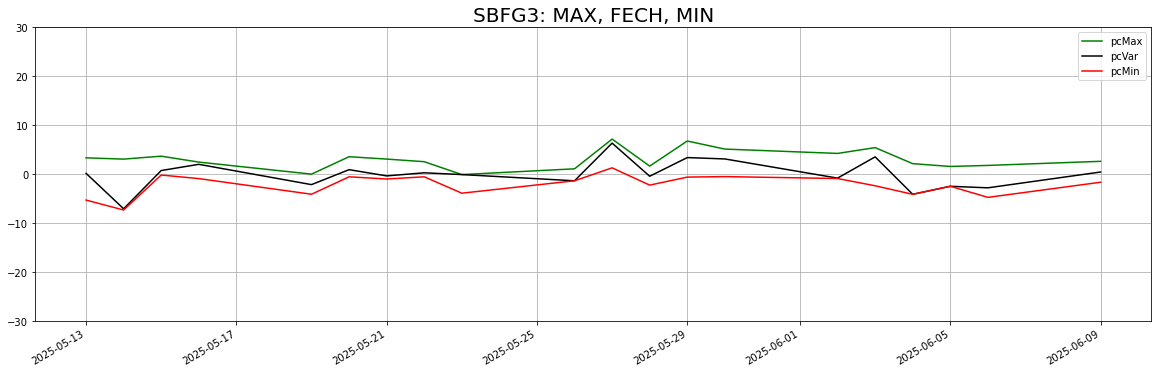

SBFG3


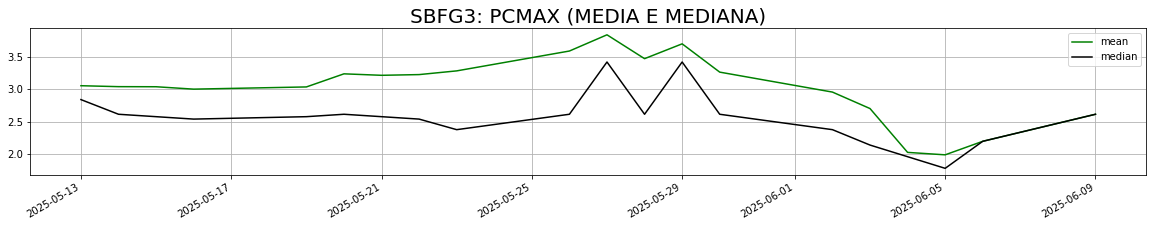

In [41]:
%run graficos_acao.ipynb

In [26]:
printmd(f'**<div style="color:white; background-color: green; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">Botões para melhores Ações de {acao_botoes}</div>**')

**<div style="color:white; background-color: green; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">Botões para melhores Ações de d15</div>**

In [27]:
buttons = widgets.HBox(lista_buttons)
widgets.VBox([buttons, output])

<p style="color:white; background-color: #F4750C; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">  Ações presentes em todos os períodos </p>

In [28]:
merge_final

,Acao
0,AMBP3F


<p style="color:white; background-color: #F4750C; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">  Grandes Variações de Volume </p>

In [29]:
grandes_variacoes_volume(df)

,Acao,dtPregao_x,vrVolume_x,pcVar_x,vrFech_x,vrVolume_y,pcVar_y,vrFech_y,dtPregao_y
706,GRND3,2025-06-06,"8,872,156.00",-1.85%,5.32,"60,360,365.00",0.56%,5.35,2025-06-09


<p style="color:white; background-color: #F4750C; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold">   </p>

IntProgress(value=0, layout=Layout(width='400px'), style=ProgressStyle(description_width='initial'))

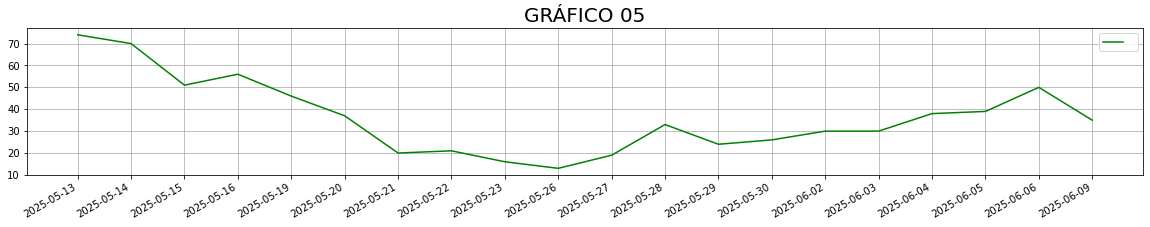

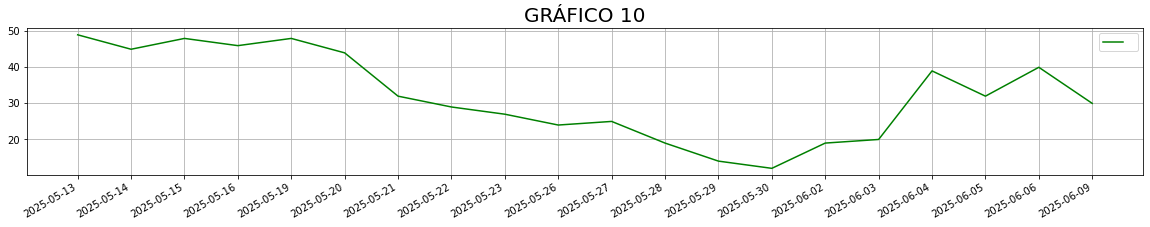

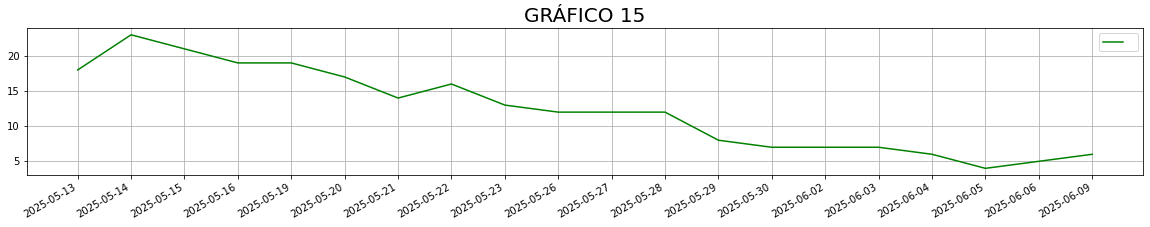

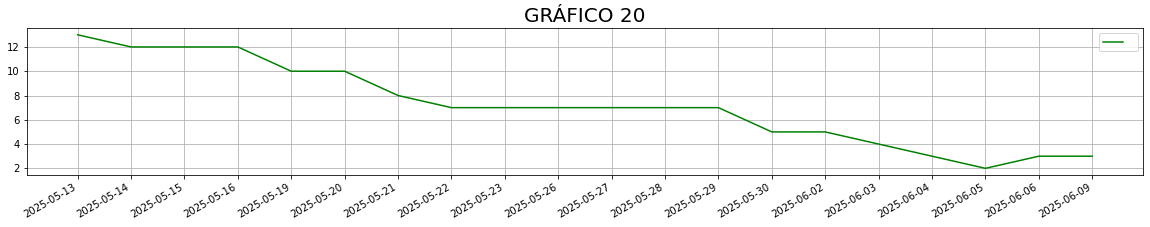

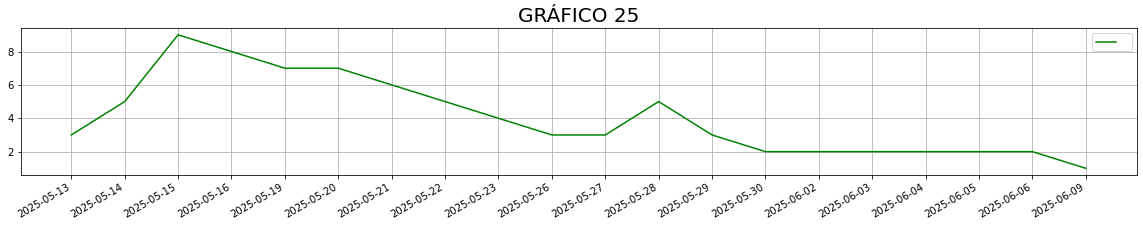

In [30]:
%run graficos_periodos.ipynb

In [31]:
bla

NameError: name 'bla' is not defined

In [ ]:
import selenium

In [ ]:
# https://stackoverflow.com/questions/39450065/python-3-read-write-compressed-json-objects-from-to-gzip-file
import gzip
import json

def write_json_gzip(data, jsonfilename):                         # 1. data
    json_str = data.to_json(date_format='iso', orient='records') # 2. string (i.e. JSON)
    json_bytes = json_str.encode('utf-8')                        # 3. bytes (i.e. UTF-8)

    with gzip.open(jsonfilename, 'w') as fout:                   # 4. fewer bytes (i.e. gzip)
        fout.write(json_bytes)
        
def read_json_gzip(jsonfilename):
    with gzip.open(jsonfilename, 'r') as fin:        # 4. gzip
        json_bytes = fin.read()                      # 3. bytes (i.e. UTF-8)

    json_str = json_bytes.decode('utf-8')            # 2. string (i.e. JSON)
    df_json = pd.read_json(json_str)
    
    df_json['dtPregao'] = pd.to_datetime(df_json['dtPregao']).dt.strftime('%Y-%m-%d')

    return df_json

In [ ]:
jsonfilename = 'teste.json.gz'
# write_json_gzip(consulta_acao(df, acao_adhoc), jsonfilename)
write_json_gzip(df, jsonfilename)

In [ ]:
# read_json_gzip(jsonfilename)